**Submission Pertama: Menyelesaikan Permasalahan Institusi Pendidikan**
- **Nama:** Aulia Afifah
- **Email:** auliaafifah2205@gmail.com
- **ID Dicoding:** auliaafifah253

# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv("data/data.csv", sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [3]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


## Pengubahan tipe data

In [6]:
df['Marital_status'] = df['Marital_status'].astype('object')
df['Application_mode'] = df['Application_mode'].astype('object')
df['Course'] = df['Course'].astype('object')
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype('object')
df['Previous_qualification'] = df['Previous_qualification'].astype('object')
df['Nacionality'] = df['Nacionality'].astype('object')
df['Mothers_qualification'] = df['Mothers_qualification'].astype('object')
df['Fathers_qualification'] = df['Fathers_qualification'].astype('object')
df['Mothers_occupation'] = df['Mothers_occupation'].astype('object')
df['Fathers_occupation'] = df['Fathers_occupation'].astype('object')
df['Displaced'] = df['Displaced'].astype('object')
df['Educational_special_needs'] = df['Educational_special_needs'].astype('object')
df['Debtor'] = df['Debtor'].astype('object')
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype('object')
df['Gender'] = df['Gender'].astype('object')
df['Scholarship_holder'] = df['Scholarship_holder'].astype('object')
df['International'] = df['International'].astype('object')

In [7]:
Marital_status = {1:'single', 2:'married', 3:'widower', 4:'divorced', 5:'facto union', 6:'legally separated'}
df['Marital_status'] = df['Marital_status'].map(Marital_status)

In [8]:
Application_mode = {1:'1st phase - general contingent', 
                    2:'Ordinance No. 612/93', 
                    5:'1st phase - special contingent (Azores Island)', 
                    7:'Holders of other higher courses', 
                    10:'Ordinance No. 854-B/99', 
                    15:'International student (bachelor)',
                   16:'1st phase - special contingent (Madeira Island)',
                   17:'2nd phase - general contingent',
                   18:'3rd phase - general contingent',
                   26:'Ordinance No. 533-A/99, item b2 (Different Plan)',
                   27:'Ordinance No. 533-A/99, item b3 (Other Institution)',
                   39:'Over 23 years old',
                   42:'Transfer',
                   43:'Change of course',
                   44:'Technological specialization diploma holders',
                   51:'Change of institution/course',
                   53:'Short cycle diploma holders',
                   57:'Change of institution/course (International)'}
df['Application_mode'] = df['Application_mode'].map(Application_mode)

In [9]:
Course = {33:'Biofuel Production Technologies', 
          171:'Animation and Multimedia Design', 
          8014:'Social Service (evening attendance)', 
          9003:'Agronomy', 
          9070:'Communication Design', 
          9085:'Veterinary Nursing',
          9119:'Informatics Engineering',
          9130:'Equinculture',
          9147:'Management',
          9238:'Social Service',
          9254:'Tourism',
          9500:'Nursing',
          9556:'Oral Hygiene',
          9670:'Advertising and Marketing Management',
          9773:'Journalism and Communication',
          9853:'Basic Education',
          9991:'Management (evening attendance)'}
df['Course'] = df['Course'].map(Course)

In [10]:
Daytime_evening_attendance = {0:'Evening', 1:'Daytime'}
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(Daytime_evening_attendance)

In [11]:
Previous_qualification = {1:'Secondary education', 
                          2:'Higher education - bachelors degree',
                          3:'Higher education - degree', 
                          4:'Higher education - masters', 
                          5:'Higher education - doctorate', 
                          6:'Frequency of higher education',
                          9:'12th year of schooling - not completed',
                          10:'11th year of schooling - not completed',
                          12:'Other - 11th year of schooling',
                          14:'10th year of schooling',
                          15:'10th year of schooling - not completed',
                          19:'Basic education 3rd cycle (9th/10th/11th year) or equiv',
                          38:'Basic education 2nd cycle (6th/7th/8th year) or equiv',
                          39:'Technological specialization course',
                          40:'Higher education - degree (1st cycle)',
                          42:'Professional higher technical course',
                          43:'Higher education - master (2nd cycle)'}
df['Previous_qualification'] = df['Previous_qualification'].map(Previous_qualification)

In [12]:
Nacionality = {1:'Portuguese', 
               2:'German', 
               6:'Spanish', 
               11:'Italian', 
               13:'Dutch', 
               14:'English',
               17:'Lithuanian',
               21:'Angolan',
               22:'Cape Verdean',
               24:'Guinean',
               25:'Mozambican',
               26:'Santomean',
               32:'Turkish',
               41:'Brazilian',
               62:'Romanian',
               100:'Moldova (Republic of)',
               101:'Mexican',
               103:'Ukrainian',
               105:'Russian',
               108:'Cuban',
               109:'Colombian'}
df['Nacionality'] = df['Nacionality'].map(Nacionality)

In [13]:
Mothers_qualification = {1: 'Secondary Education - 12th Year of Schooling or Eq',
                         2: 'Higher Education - Bachelors Degree',
                         3: 'Higher Education - Degree',
                         4: 'Higher Education - Masters',
                         5: 'Higher Education - Doctorate',
                         6: 'Frequency of Higher Education',
                         9: '12th Year of Schooling - Not Completed',
                         10: '11th Year of Schooling - Not Completed',
                         11: '7th YO',
                         12: 'Other - 11th Year of Schooling',
                         14: '10th Year of Schooling',
                         18: 'General commerce course',
                         19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv',
                         22: 'Technical-professional course',
                         26: '7th year of schooling',
                         27: '2nd cycle of the general high school course',
                         29: '9th Year of Schooling - Not Completed',
                         30: '8th year of schooling',
                         34: 'Unknown',
                         35: 'Cant read or write',
                         36: 'Can read without having a 4th year of schooling',
                         37: 'Basic education 1st cycle (4th/5th year) or equiv',
                         38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv',
                         39: 'Technological specialization course',
                         40: 'Higher education - degree (1st cycle)',
                         41: 'Specialized higher studies course',
                         42: 'Professional higher technical course',
                         43: 'Higher Education - Master (2nd cycle)',
                         44: 'Higher Education - Doctorate (3rd cycle)'}
df['Mothers_qualification'] = df['Mothers_qualification'].map(Mothers_qualification)

In [14]:
Fathers_qualification = {1: 'Secondary Education - 12th Year of Schooling or Eq',
                         2: 'Higher Education - Bachelors Degree',
                         3: 'Higher Education - Degree',
                         4: 'Higher Education - Masters',
                         5: 'Higher Education - Doctorate',
                         6: 'Frequency of Higher Education',
                         9: '12th Year of Schooling - Not Completed',
                         10: '11th Year of Schooling - Not Completed',
                         11: '7th YO',
                         12: 'Other - 11th Year of Schooling',
                         13: '2nd year complementary high school course',
                         14: '10th Year of Schooling',
                         18: 'General commerce course',
                         19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv',
                         20: 'Complementary High School Course',
                         22: 'Technical-professional course',
                         25: 'Complementary High School Course - not concluded',
                         26: '7th year of schooling',
                         27: '2nd cycle of the general high school course',
                         29: '9th Year of Schooling - Not Completed',
                         30: '8th year of schooling',
                         31: 'General Course of Administration and Commerce',
                         33: 'Supplementary Accounting and Administration',
                         34: 'Unknown',
                         35: 'Cant read or write',
                         36: 'Can read without having a 4th year of schooling',
                         37: 'Basic education 1st cycle (4th/5th year) or equiv',
                         38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv',
                         39: 'Technological specialization course',
                         40: 'Higher education - degree (1st cycle)',
                         41: 'Specialized higher studies course',
                         42: 'Professional higher technical course',
                         43: 'Higher Education - Master (2nd cycle)',
                         44: 'Higher Education - Doctorate (3rd cycle)'}
df['Fathers_qualification'] = df['Fathers_qualification'].map(Fathers_qualification)

In [15]:
Mothers_occupation = {0: 'Student',
                      1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
                      2: 'Specialists in Intellectual and Scientific Activities',
                      3: 'Intermediate Level Technicians and Professions',
                      4: 'Administrative staff',
                      5: 'Personal Services, Security and Safety Workers and Sellers',
                      6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
                      7: 'Skilled Workers in Industry, Construction and Craftsmen',
                      8: 'Installation and Machine Operators and Assembly Workers',
                      9: 'Unskilled Workers',
                      10: 'Armed Forces Professions',
                      90: 'Other Situation',
                      99: '(blank)',
                      122: 'Health professionals',
                      123: 'Teachers',
                      125: 'Specialists in information and communication technologies (ICT)',
                      131: 'Intermediate level science and engineering technicians and professions',
                      132: 'Technicians and professionals, of intermediate level of health',
                      134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
                      141: 'Office workers, secretaries in general and data processing operators',
                      143: 'Data, accounting, statistical, financial services and registry-related operators',
                      144: 'Other administrative support staff',
                      151: 'Personal service workers',
                      152: 'Sellers',
                      153: 'Personal care workers and the like',
                      171: 'Skilled construction workers and the like, except electricians',
                      173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
                      175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
                      191: 'Cleaning workers',
                      192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
                      193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
                      194: 'Meal preparation assistants'}
df['Mothers_occupation'] = df['Mothers_occupation'].map(Mothers_occupation)

In [16]:
Fathers_occupation = {0: 'Student',
                      1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
                      2: 'Specialists in Intellectual and Scientific Activities',
                      3: 'Intermediate Level Technicians and Professions',
                      4: 'Administrative staff',
                      5: 'Personal Services, Security and Safety Workers and Sellers',
                      6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
                      7: 'Skilled Workers in Industry, Construction and Craftsmen',
                      8: 'Installation and Machine Operators and Assembly Workers',
                      9: 'Unskilled Workers',
                      10: 'Armed Forces Professions',
                      90: 'Other Situation',
                      99: '(blank)',
                      101: 'Armed Forces Officers',
                      102: 'Armed Forces Sergeants',
                      103: 'Other Armed Forces personnel',
                      112: 'Directors of administrative and commercial services',
                      114: 'Hotel, catering, trade and other services directors',
                      121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
                      122: 'Health professionals',
                      123: 'Teachers',
                      124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
                      131: 'Intermediate level science and engineering technicians and professions',
                      132: 'Technicians and professionals, of intermediate level of health',
                      134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
                      135: 'Information and communication technology technicians',
                      141: 'Office workers, secretaries in general and data processing operators',
                      143: 'Data, accounting, statistical, financial services and registry-related operators',
                      144: 'Other administrative support staff',
                      151: 'Personal service workers',
                      152: 'Sellers',
                      153: 'Personal care workers and the like',
                      154: 'Protection and security services personnel',
                      161: 'Market-oriented farmers and skilled agricultural and animal production workers',
                      163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
                      171: 'Skilled construction workers and the like, except electricians',
                      172: 'Skilled workers in metallurgy, metalworking and similar',
                      174: 'Skilled workers in electricity and electronics',
                      175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
                      181: 'Fixed plant and machine operators',
                      182: 'Assembly workers',
                      183: 'Vehicle drivers and mobile equipment operators',
                      192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
                      193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
                      194: 'Meal preparation assistants',
                      195: 'Street vendors (except food) and street service providers'}
df['Fathers_occupation'] = df['Fathers_occupation'].map(Fathers_occupation)

In [17]:
Displaced = {0:'No', 1:'Yes'}
df['Displaced'] = df['Displaced'].map(Displaced)

In [18]:
Educational_special_needs = {0:'No', 1:'Yes'}
df['Educational_special_needs'] = df['Educational_special_needs'].map(Educational_special_needs)

In [19]:
Debtor = {0:'No', 1:'Yes'}
df['Debtor'] = df['Debtor'].map(Debtor)

In [20]:
Tuition_fees_up_to_date = {0:'No', 1:'Yes'}
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(Tuition_fees_up_to_date)

In [21]:
Gender = {0:'Female', 1:'Male'}
df['Gender'] = df['Gender'].map(Gender)

In [22]:
Scholarship_holder = {0:'No', 1:'Yes'}
df['Scholarship_holder'] = df['Scholarship_holder'].map(Scholarship_holder)

In [23]:
International = {0:'No', 1:'Yes'}
df['International'] = df['International'].map(International)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [25]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or equiv,Basic education 1st cycle (4th/5th year) or equiv,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or equiv,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or equiv,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Exploratory Data Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [27]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,NaN,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,single,1st phase - general contingent,NaN,Nursing,Daytime,Secondary education,NaN,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or equiv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,NaN,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,1.727848,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,1.313793,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


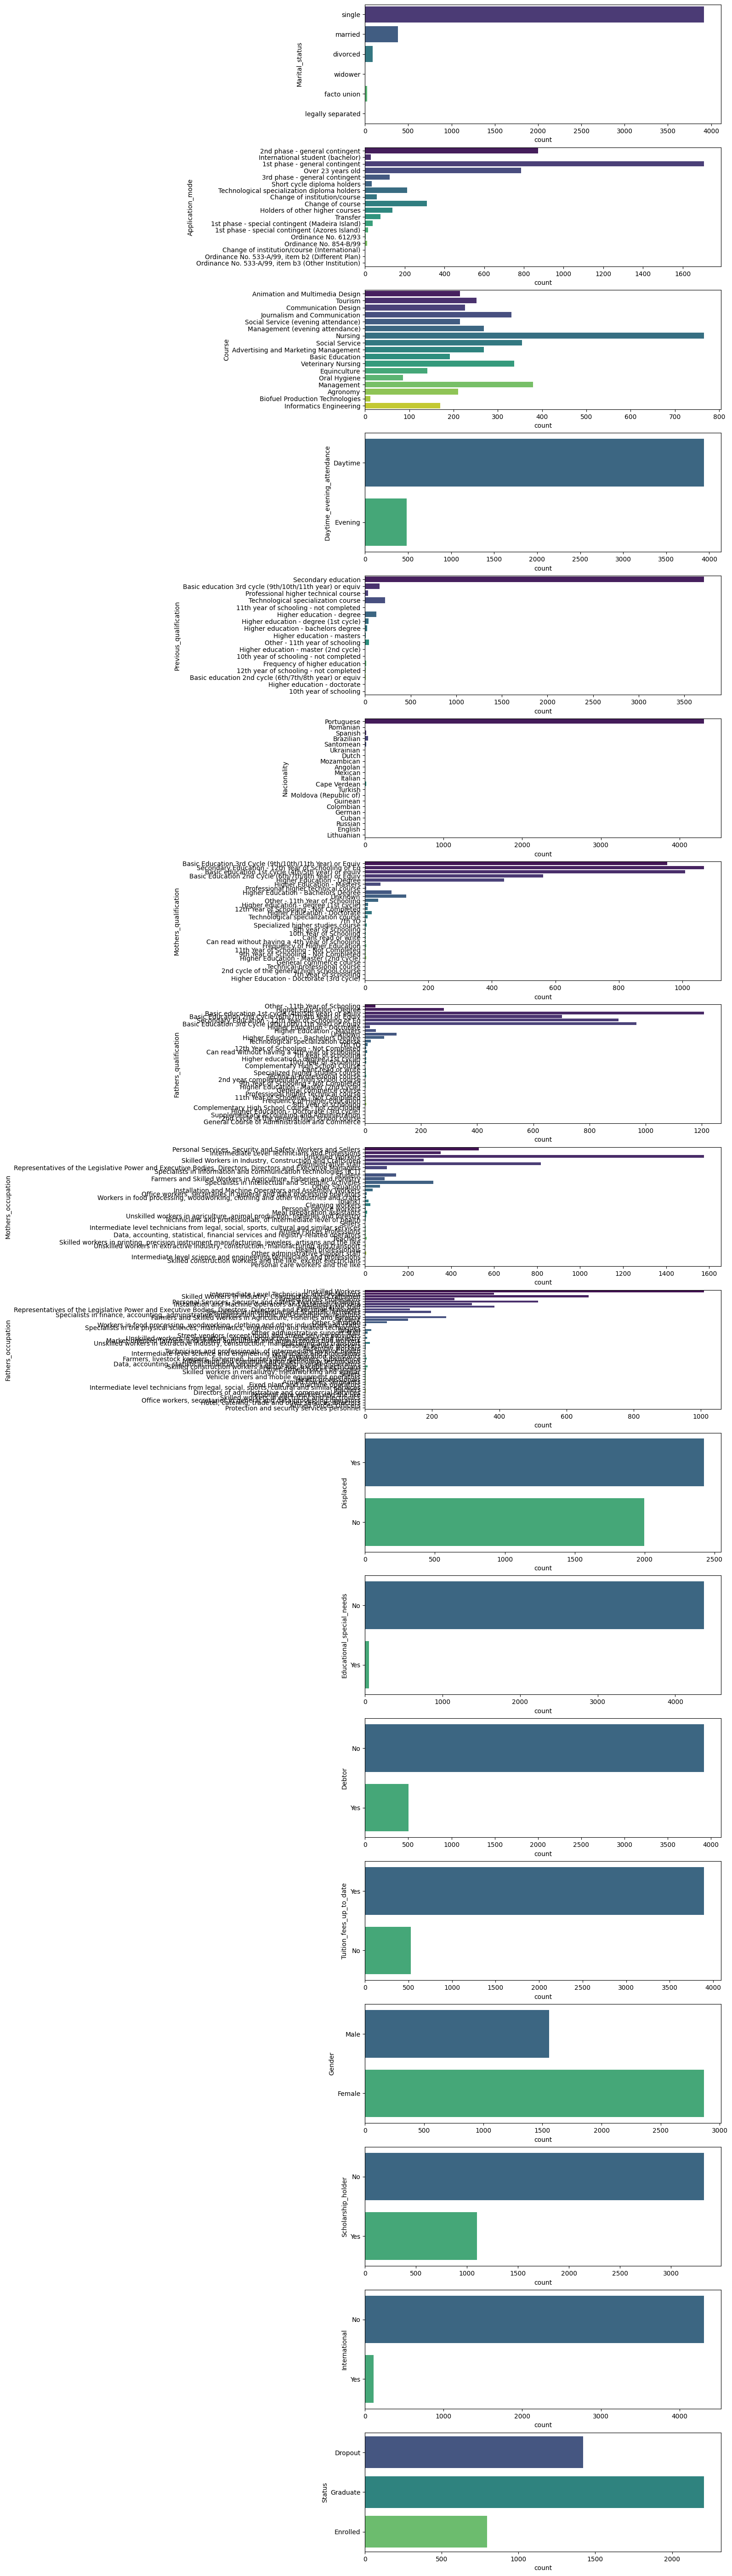

In [28]:
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]
 
fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10, 4*len(categorical_columns)))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i], palette='viridis')
plt.show()

In [29]:
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]

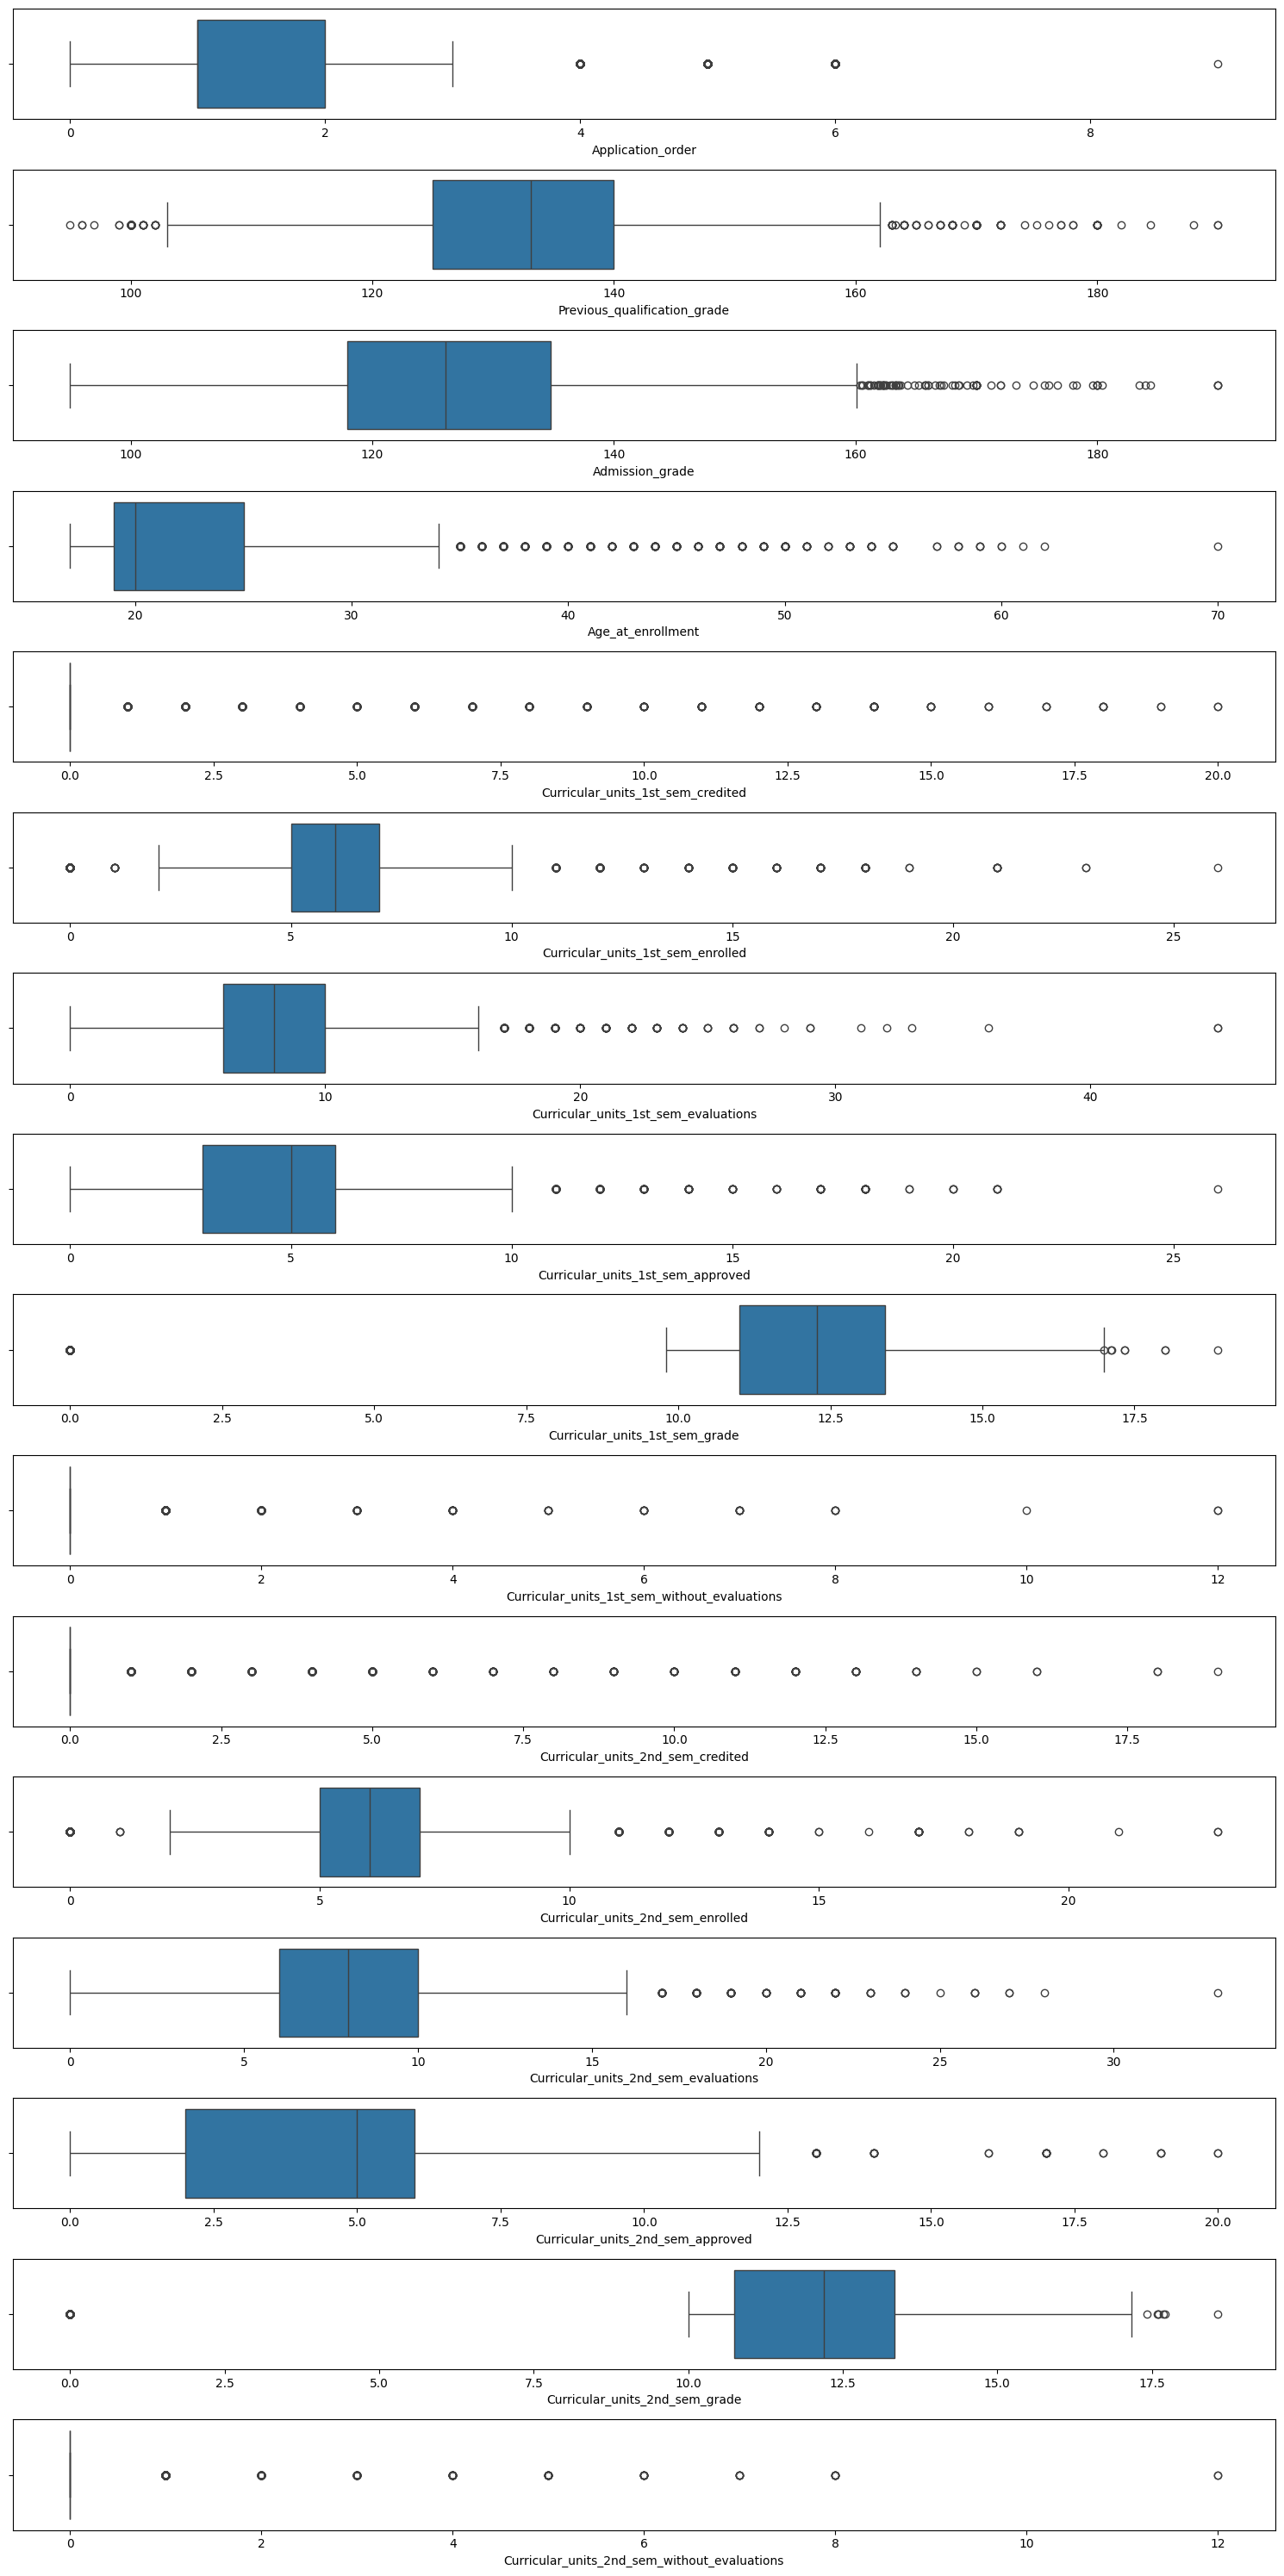

In [30]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()
 
numerical_dis_plot(
    features=numerical_columns,
    df=df
)

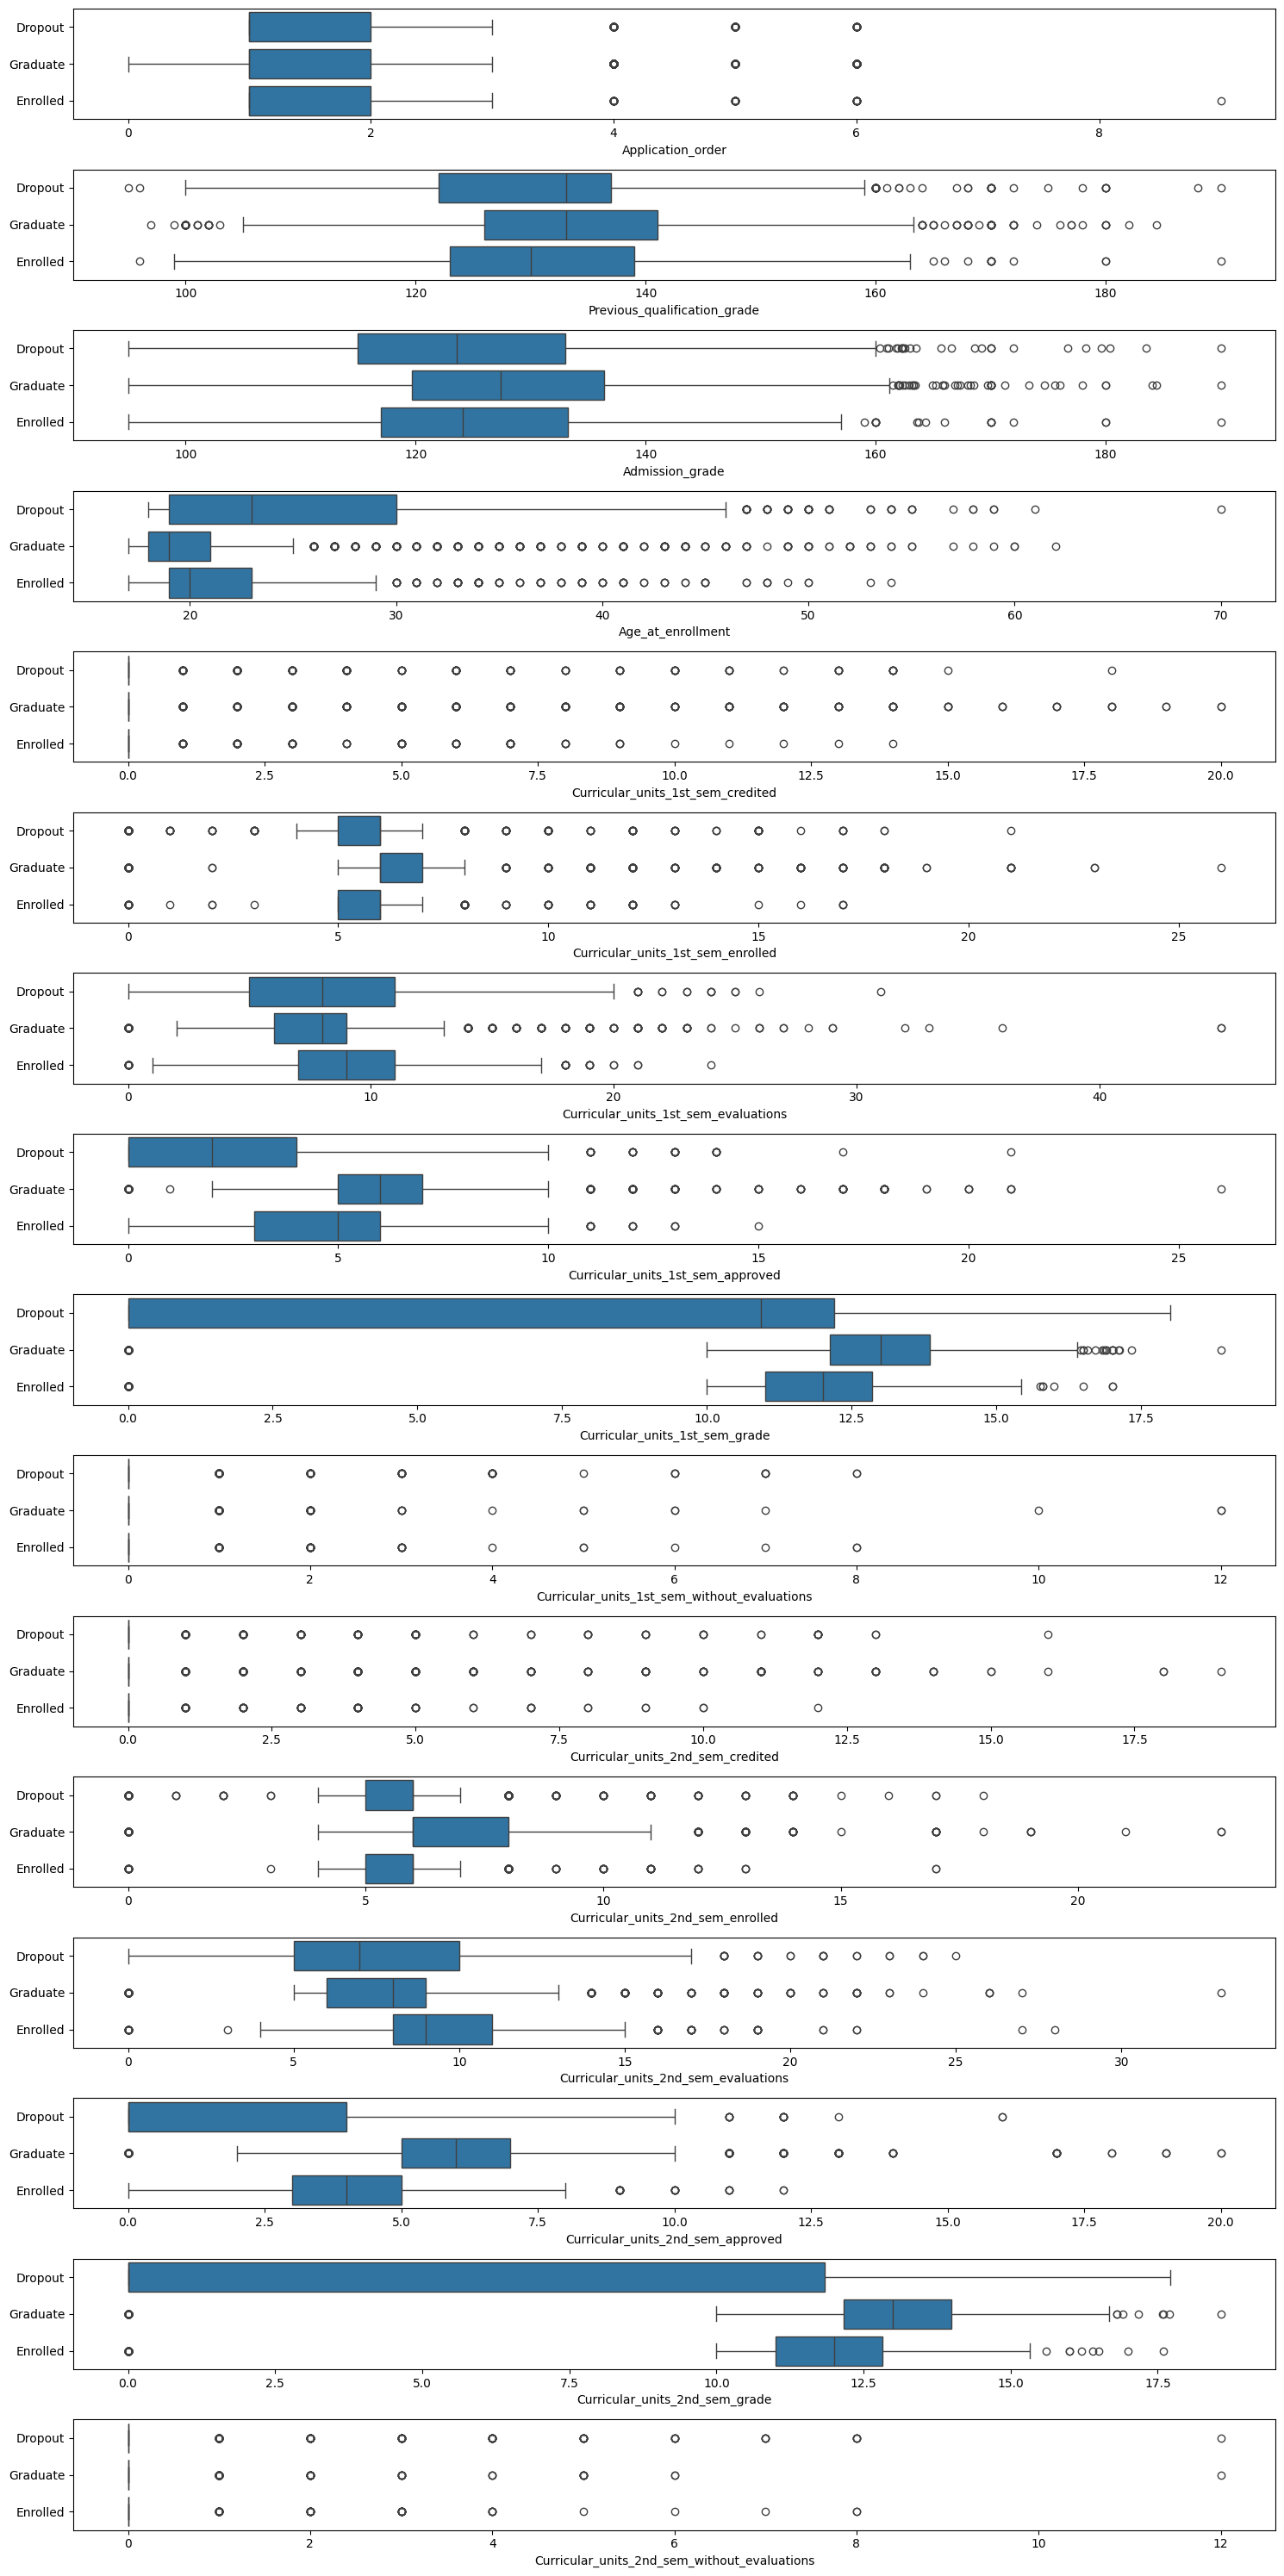

In [31]:
numerical_dis_plot(
    features=numerical_columns,
    df=df,
    segment_feature="Status"
)

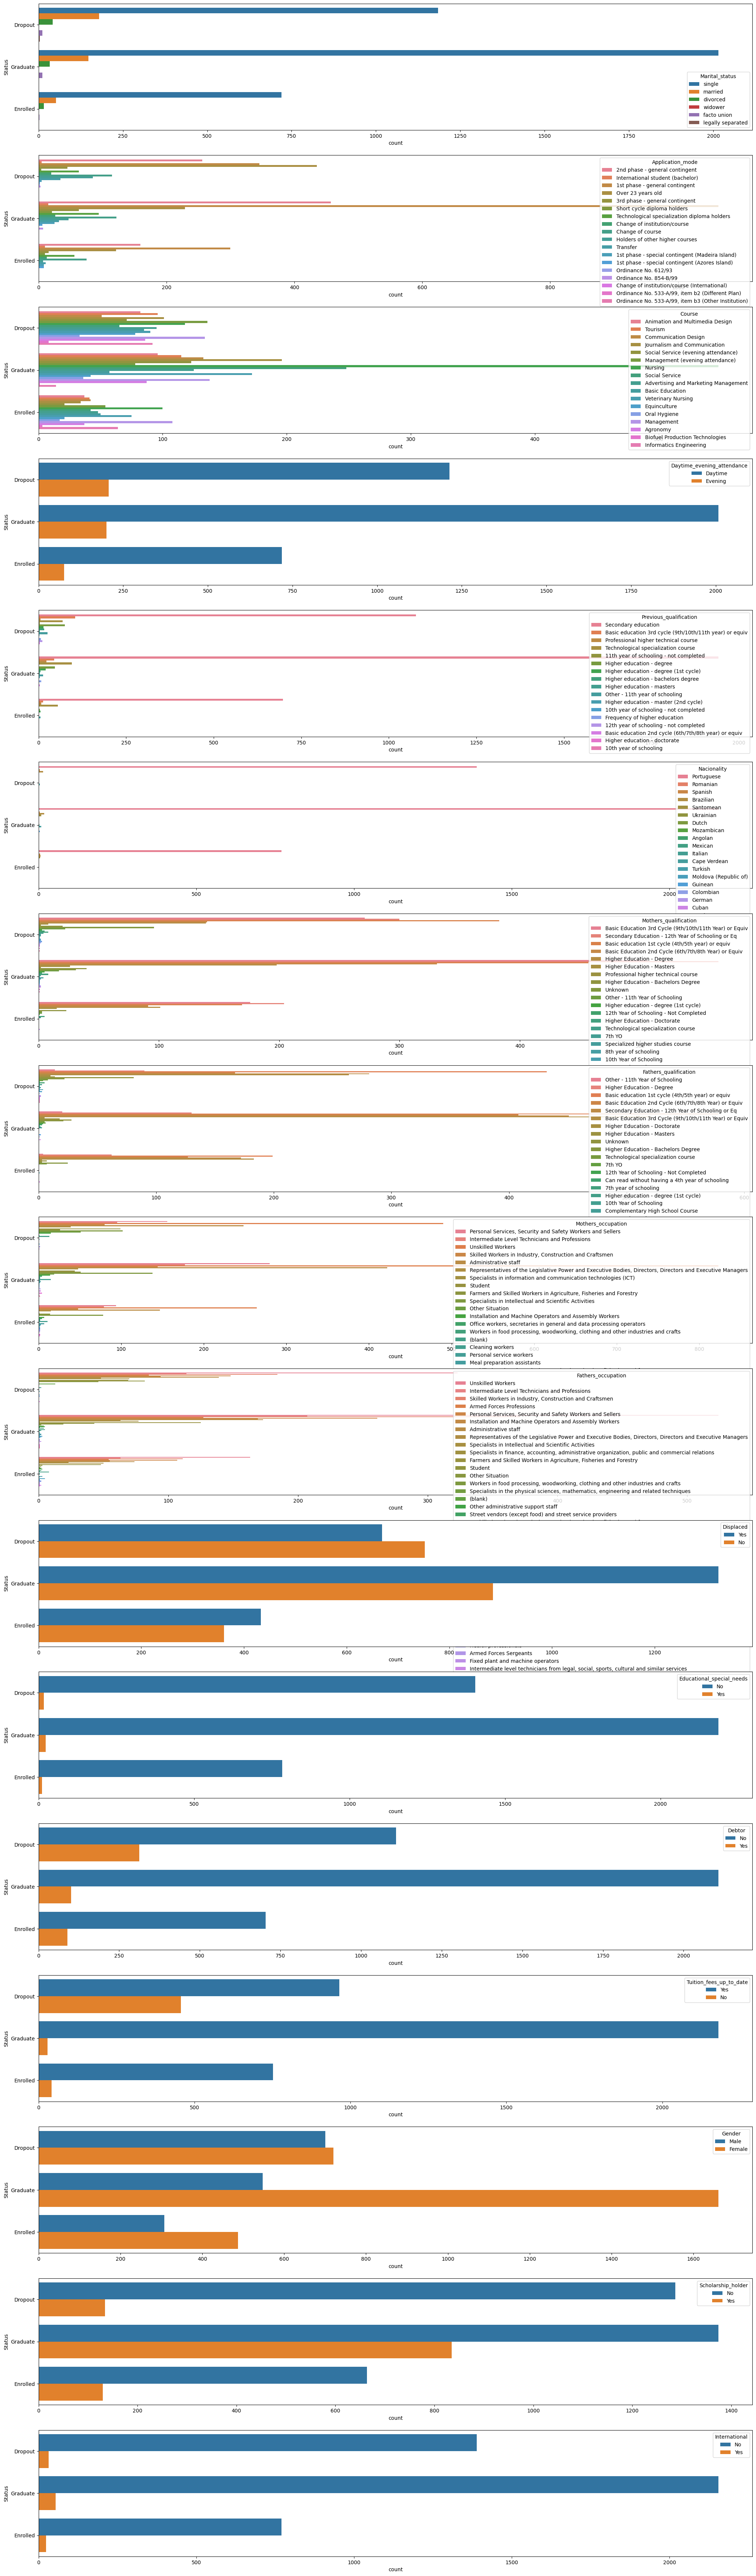

In [32]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(25,5*len(categorical_columns)))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()
 
categorical_plot(
    features=[
        'Marital_status',
        'Application_mode',
        'Course',
        'Daytime_evening_attendance',
        'Previous_qualification',
        'Nacionality',
        'Mothers_qualification',
        'Fathers_qualification',
        'Mothers_occupation',
        'Fathers_occupation',
        'Displaced',
        'Educational_special_needs',
        'Debtor',
        'Tuition_fees_up_to_date',
        'Gender',
        'Scholarship_holder',
        'International'
    ],
    df=df,
    segment_feature="Status"
)

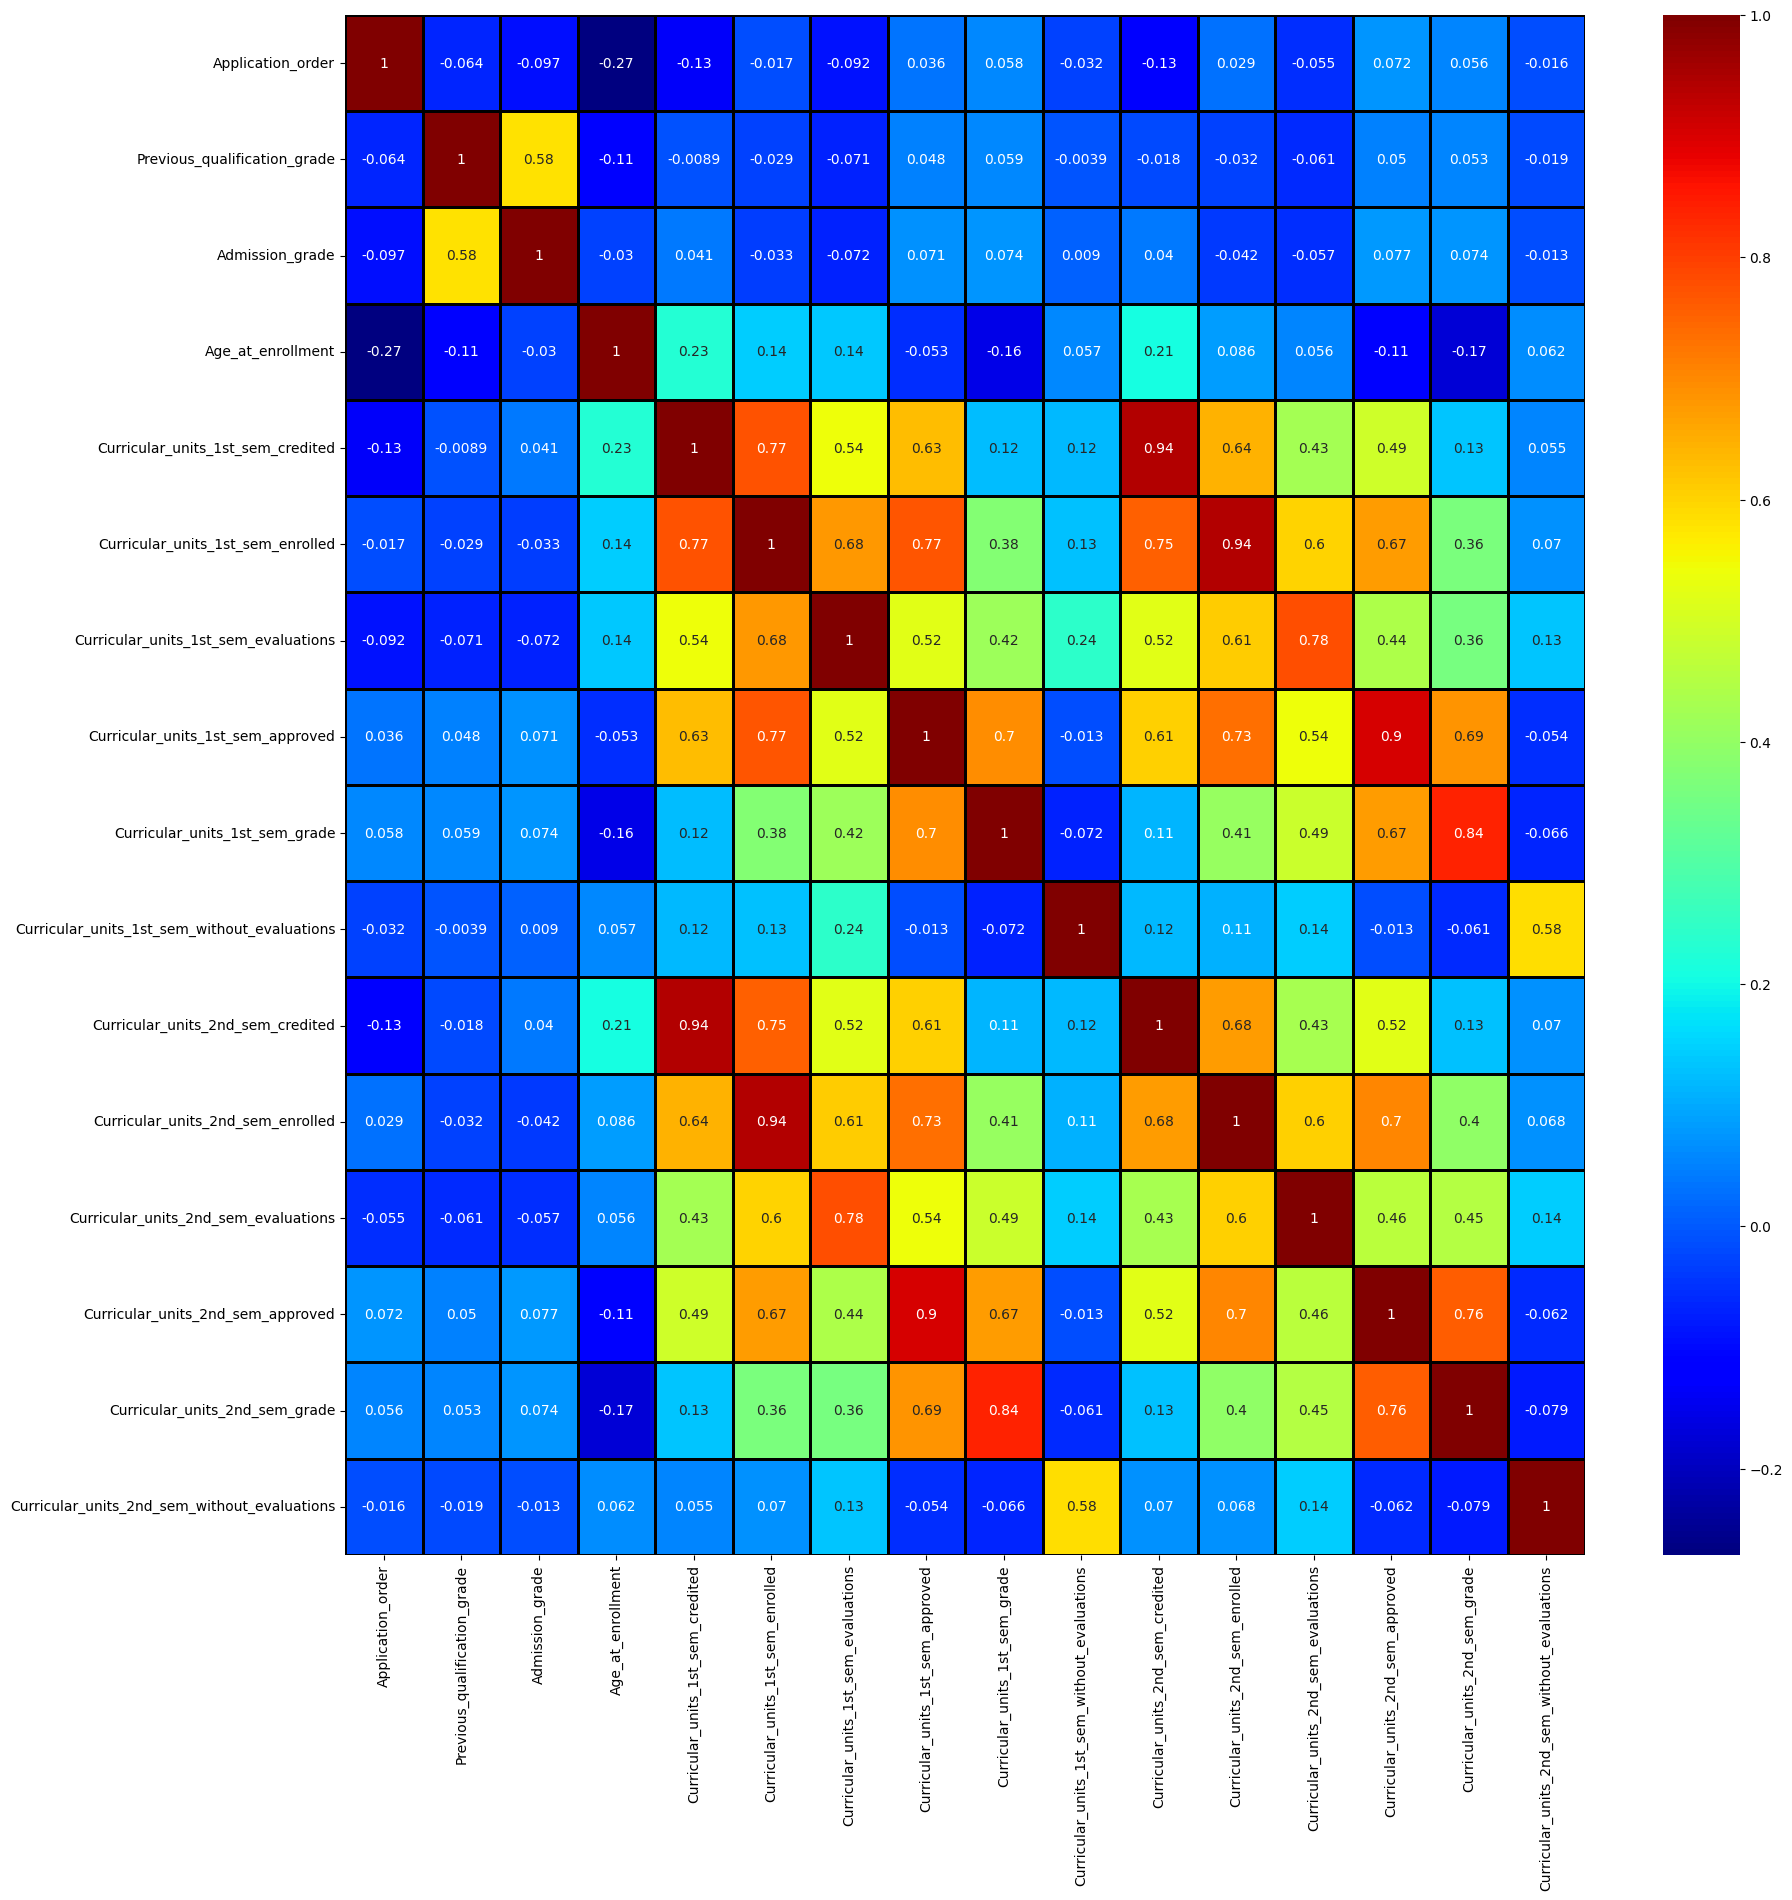

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

# Data Preprocessing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

In [35]:
new_df = df.drop(columns=['Marital_status',
                          'Application_mode',
                          'Application_order',
                          'Previous_qualification',
                          'Nacionality',
                          'Gender',
                          'International',
                          'Curricular_units_1st_sem_approved',
                          'Curricular_units_2nd_sem_approved',
                          'Unemployment_rate', 
                          'Inflation_rate', 
                          'GDP'], 
                 axis=1)
new_df.head()

,Course,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,Animation and Multimedia Design,Daytime,122.0,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,Yes,No,...,0,0,0.000000,0,0,0,0,0.000000,0,Dropout
1,Tourism,Daytime,160.0,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,Yes,No,...,6,6,14.000000,0,0,6,6,13.666667,0,Graduate
2,Communication Design,Daytime,122.0,Basic education 1st cycle (4th/5th year) or equiv,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,124.8,Yes,No,...,6,0,0.000000,0,0,6,0,0.000000,0,Dropout
3,Journalism and Communication,Daytime,122.0,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or equiv,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,Yes,No,...,6,8,13.428571,0,0,6,10,12.400000,0,Graduate
4,Social Service (evening attendance),Evening,100.0,Basic education 1st cycle (4th/5th year) or equiv,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,No,No,...,6,9,12.333333,0,0,6,6,13.000000,0,Graduate


In [36]:
train_df, test_df = train_test_split(new_df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(4202, 25)
(222, 25)


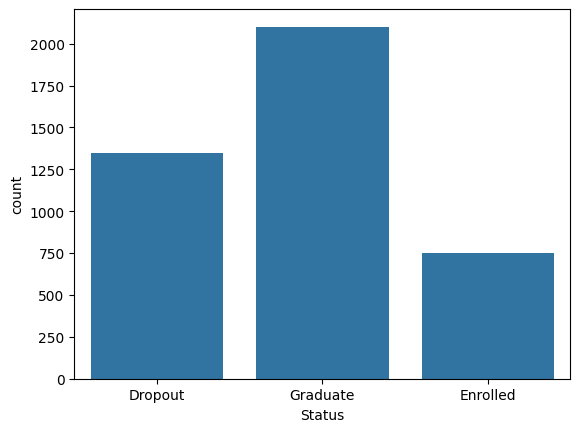

In [37]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [38]:
train_df.Status.value_counts()

Status
Graduate    2101
Dropout     1349
Enrolled     752
Name: count, dtype: int64

In [39]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]

In [40]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=752, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=752, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(752, 25)
(752, 25)


In [41]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Course,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,...,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
571,Veterinary Nursing,Daytime,130.0,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Administrative staff,Intermediate Level Technicians and Professions,130.0,Yes,No,...,6,13,11.8000,0,0,6,19,12.00,0,Enrolled
1058,Agronomy,Daytime,133.1,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,"Skilled Workers in Industry, Construction and ...",110.0,Yes,No,...,6,8,0.0000,0,0,6,10,0.00,0,Dropout
717,Nursing,Daytime,154.0,Basic education 1st cycle (4th/5th year) or equiv,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,149.5,Yes,No,...,7,8,14.9125,0,0,8,9,13.50,0,Dropout
11,Social Service,Daytime,133.1,Basic Education 3rd Cycle (9th/10th/11th Year)...,Secondary Education - 12th Year of Schooling o...,Representatives of the Legislative Power and E...,Intermediate Level Technicians and Professions,101.0,No,No,...,6,0,0.0000,0,0,6,0,0.00,0,Dropout
823,Management (evening attendance),Evening,140.0,Basic education 1st cycle (4th/5th year) or equiv,Basic education 1st cycle (4th/5th year) or equiv,Unskilled Workers,Unskilled Workers,140.0,No,No,...,5,6,13.5000,0,0,5,6,13.75,0,Graduate


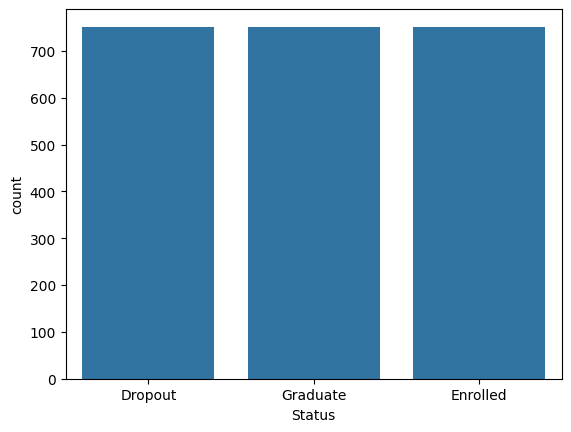

In [42]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

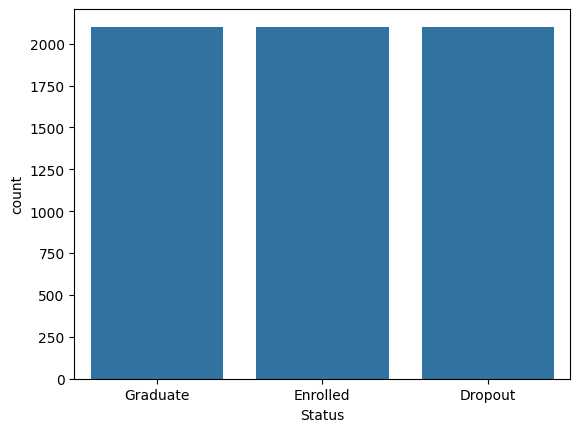

In [43]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]
 
 
df_majority_2_undersampled = resample(df_majority_2, n_samples=2101, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2101, random_state=42)
 
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
 
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [44]:
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]
 
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [45]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asarray(df[feature]).reshape(-1, 1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asarray(df_test[feature]).reshape(-1, 1)
            df_test[feature] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asarray(df[feature]).reshape(-1, 1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            combined_data = pd.concat([df[feature], df_test[feature]], axis=0)
            encoder.fit(combined_data)
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test[feature] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [46]:
numerical_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]
 
categorical_columns = [
    'Course',
    'Daytime_evening_attendance',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [47]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

In [48]:
pca_numerical_columns_1 = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations'
]
 
pca_numerical_columns_2 = [
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]

In [49]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

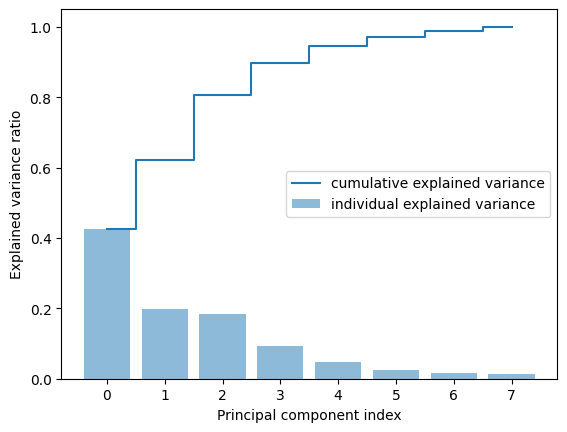

In [50]:
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [51]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Course,Daytime_evening_attendance,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,7,0,13,16,21,25,0,0,0,1,...,0.000000,0.217391,0.000000,0.000000,0.0,0.572434,-0.144807,0.371055,-0.068728,0.005351
1,5,0,6,8,26,31,0,0,0,1,...,0.000000,0.260870,0.212121,0.621739,0.0,-0.053009,0.107248,-0.167685,-0.026149,0.031573
2,13,0,20,8,26,31,0,0,0,1,...,0.000000,0.260870,0.272727,0.654037,0.0,-0.064416,-0.072006,-0.029584,0.015450,0.030032
3,16,0,13,8,21,1,1,0,0,1,...,0.055556,0.260870,0.545455,0.715942,0.0,-0.166879,-0.240710,0.175009,0.001156,0.017082
4,10,1,6,7,26,12,0,0,0,1,...,0.000000,0.217391,0.303030,0.612319,0.0,-0.054804,0.032092,0.247752,-0.165136,0.129604


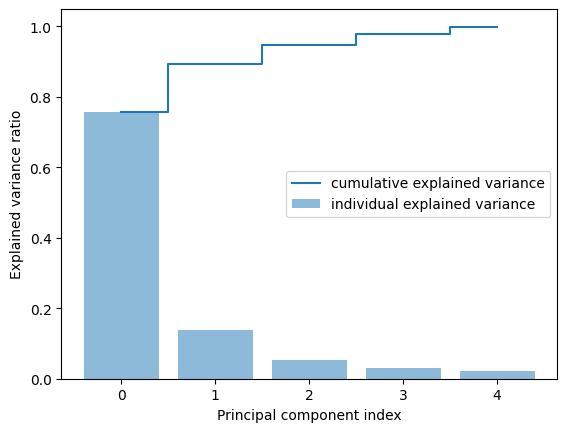

In [52]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [53]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Course,Daytime_evening_attendance,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,7,0,13,16,21,25,0,0,0,1,0,0.572434,-0.144807,0.371055,-0.068728,0.005351,0.600545,-0.042581
1,5,0,6,8,26,31,0,0,0,1,1,-0.053009,0.107248,-0.167685,-0.026149,0.031573,-0.052634,-0.056014
2,13,0,20,8,26,31,0,0,0,1,1,-0.064416,-0.072006,-0.029584,0.015450,0.030032,-0.098451,-0.027379
3,16,0,13,8,21,1,1,0,0,1,0,-0.166879,-0.240710,0.175009,0.001156,0.017082,-0.228488,0.154008
4,10,1,6,7,26,12,0,0,0,1,0,-0.054804,0.032092,0.247752,-0.165136,0.129604,-0.059953,-0.018760


In [54]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
 
test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Course,Daytime_evening_attendance,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,6,0,13,22,15,19,1,0,0,1,1,0.552155,0.155178,0.028257,0.035453,-0.131260,-0.065643,0.126289
1,13,0,16,17,17,20,0,0,0,1,0,-0.073038,0.012172,-0.165205,0.013316,0.017528,-0.121903,-0.054523
2,3,0,6,7,26,31,0,0,1,1,1,-0.137539,-0.075150,-0.091940,0.009915,0.003393,-0.128207,-0.054235
3,0,0,20,22,1,2,1,0,0,1,0,-0.173718,0.134688,-0.240452,-0.040749,0.108165,-0.168264,-0.067350
4,11,0,8,8,26,11,1,0,0,1,0,0.511557,0.190788,-0.031006,0.129278,-0.138201,0.484111,0.259764


# Modelling

## Grid Search

In [55]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}
 
log_model = LogisticRegression(random_state=123)
 
CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

## Decision Tree

In [56]:
tree_model = DecisionTreeClassifier(random_state=123)
 
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [57]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [58]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini', 
    max_depth=8, 
    max_features='sqrt'
)
 
tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

## Random Forest

In [59]:
rdf_model = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [60]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [61]:
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=8, 
    n_estimators=500, 
    max_features='sqrt', 
    criterion='entropy', 
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Gradient Boosting

In [62]:
gboost_model = GradientBoostingClassifier(random_state=123)
 
param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}
 
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [63]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [64]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1, 
    max_depth=8, 
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

# Evaluation

In [65]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Enrolled', 'Dropout']
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    
    return confusion_matrix_df

In [66]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.83      0.61      0.70        72
    Enrolled       0.35      0.55      0.43        42
    Graduate       0.74      0.71      0.73       108

    accuracy                           0.65       222
   macro avg       0.64      0.62      0.62       222
weighted avg       0.70      0.65      0.66       222



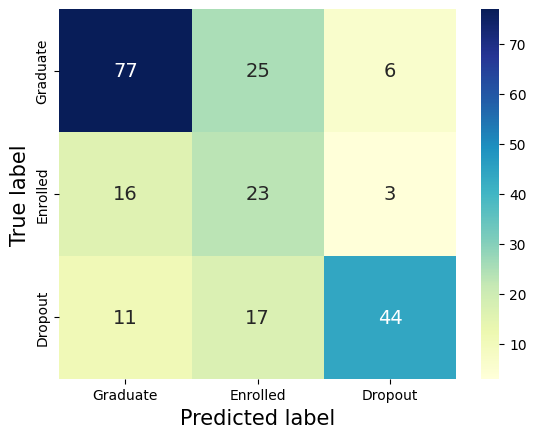

,Graduate,Enrolled,Dropout
Graduate,77,25,6
Enrolled,16,23,3
Dropout,11,17,44


In [67]:
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.88      0.64      0.74        72
    Enrolled       0.36      0.55      0.43        42
    Graduate       0.74      0.72      0.73       108

    accuracy                           0.66       222
   macro avg       0.66      0.64      0.63       222
weighted avg       0.71      0.66      0.68       222



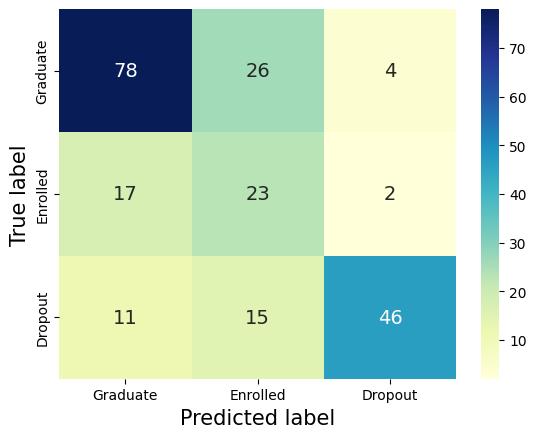

,Graduate,Enrolled,Dropout
Graduate,78,26,4
Enrolled,17,23,2
Dropout,11,15,46


In [68]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
 
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.81      0.65      0.72        72
    Enrolled       0.34      0.60      0.43        42
    Graduate       0.74      0.62      0.68       108

    accuracy                           0.63       222
   macro avg       0.63      0.62      0.61       222
weighted avg       0.69      0.63      0.65       222



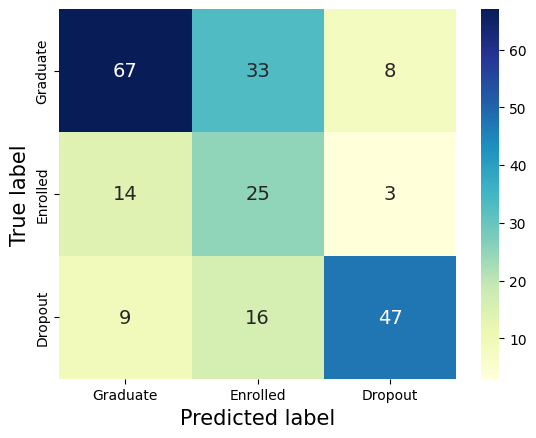

,Graduate,Enrolled,Dropout
Graduate,67,33,8
Enrolled,14,25,3
Dropout,9,16,47


In [69]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)
 
evaluating(y_pred=y_pred_test, y_true=y_test)

In [70]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

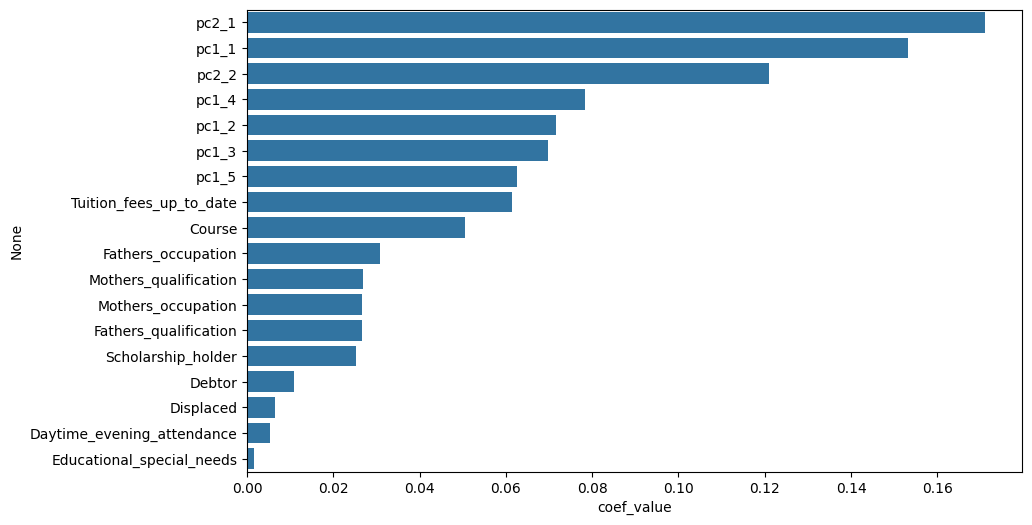

,coef_value
pc2_1,0.171082
pc1_1,0.153269
pc2_2,0.120916
pc1_4,0.078284
pc1_2,0.071644
pc1_3,0.069727
pc1_5,0.062662
Tuition_fees_up_to_date,0.061340
Course,0.050538
Fathers_occupation,0.030732


In [71]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features
 
plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)